In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_drug, trial_data, on="Mouse ID", how="right")

# Display the data table for preview
mouse_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_tumor = mouse_data.groupby(["Drug","Timepoint"])
mean_tumor = group_tumor.mean()
# Convert to DataFrame
mean_tumor = pd.DataFrame(mean_tumor).reset_index()
mean_tumor = mean_tumor.drop(columns=["Metastatic Sites"])
# Preview DataFrame
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_se = mouse_data.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
tumor_volume_se = pd.DataFrame(tumor_volume_se).reset_index()
tumor_volume_se = tumor_volume_se.drop(columns=["Metastatic Sites","Mouse ID"])
tumor_volume_se = tumor_volume_se.rename(columns={"Tumor Volume (mm3)":"Tumor Volume SE"})
# Preview DataFrame
tumor_volume_se.head()


,Drug,Timepoint,Tumor Volume SE
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
re_format_vol = mean_tumor.pivot_table("Tumor Volume (mm3)", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
re_format_vol

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Minor Data Munging to Re-Format the Data Frames
re_format_se = tumor_volume_se.pivot_table("Tumor Volume SE", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
re_format_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


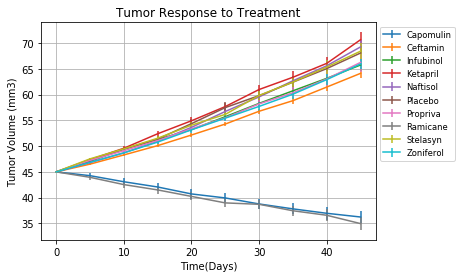

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)
drugs = mean_tumor["Drug"].unique()

fig, ax = plt.subplots()

ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")


for d in drugs:
    ax.errorbar(x_axis, re_format_vol[d], yerr=re_format_se[d], alpha=1, label=d)
    
ax.legend(bbox_to_anchor =(1,1), fontsize="small",fancybox=True)
ax.grid()
# Save the Figure
plt.savefig("Tumor_response_to_treatment.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_tumor = mouse_data.groupby(["Drug","Timepoint"])
mean_meta = group_tumor.mean()
# Convert to DataFrame
mean_meta = pd.DataFrame(mean_meta)
mean_meta = mean_meta.drop(columns=["Tumor Volume (mm3)"])
# Preview DataFrame
mean_meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_se = mouse_data.groupby(["Drug","Timepoint"]).sem()
# Convert to DataFrame
meta_se = pd.DataFrame(meta_se)
meta_se = meta_se.drop(columns=["Mouse ID","Tumor Volume (mm3)"])
# Preview DataFrame
meta_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames for Mean
re_format_meta_mean = mean_meta.pivot_table("Metastatic Sites", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
re_format_meta_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames for SE
re_format_meta_se = meta_se.pivot_table("Metastatic Sites", index=["Timepoint"], columns=["Drug"])
# Preview that Reformatting worked
re_format_meta_se.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


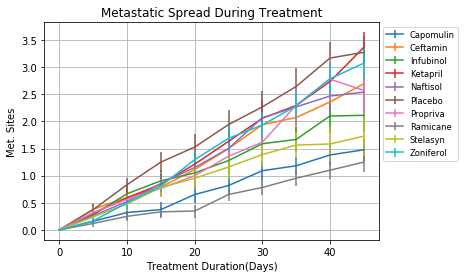

In [11]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)

fig, ax = plt.subplots()

ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Met. Sites")
ax.set_title("Metastatic Spread During Treatment")
ax.grid()

for d in drugs:
    ax.errorbar(x_axis, re_format_meta_mean[d], yerr=re_format_meta_se[d], alpha=1, label=d)
    
ax.legend(bbox_to_anchor =(1,1), fontsize="small",fancybox=True)
# Save the Figure
plt.savefig("Metastatic_spread_during_treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_tumor = mouse_data.groupby(["Drug","Timepoint"])
mouse_count = group_tumor.count()
# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count).reset_index()
mouse_count = mouse_count.drop(columns=["Tumor Volume (mm3)","Metastatic Sites"])
mouse_count = mouse_count.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
re_format_mouse_count= mouse_count.pivot_table("Mouse Count", index=["Timepoint"], columns=["Drug"])
# Preview the Data Frame
re_format_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
#Convert table to percentage
re_format_mouse_count= mouse_count.pivot_table("Mouse Count", index=["Timepoint"], columns=["Drug"])

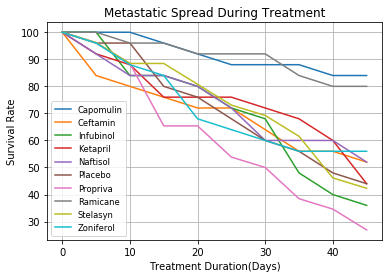

In [15]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0,50,5)

fig, ax = plt.subplots()

ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Survival Rate")
ax.set_title("Metastatic Spread During Treatment")
ax.grid()

for d in drugs:
    ax.plot(x_axis, re_format_mouse_count[d]/re_format_mouse_count[d][0]*100, alpha=1, label=d)
    
ax.legend(loc="best", fontsize="small",fancybox=True)
# Save the Figure
plt.savefig("Mouse_survival_rate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes of mean tumor volume for using each drug
percent_change_tracker = []
entries = re_format_vol["Capomulin"].unique()
for d in drugs:
    start_size = re_format_vol[d][0]
    end_size = re_format_vol[d][45]
    
    percent_change = ((end_size-start_size)/start_size)*100
    percent_change_tracker.append(percent_change)

# Display the data to confirm
tumor_volume_change = pd.DataFrame({
    "Drug":drugs,
    "Percent Change":percent_change_tracker
})
tumor_volume_change

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


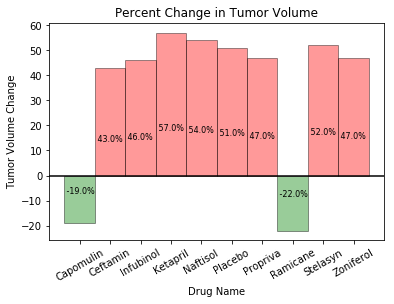

In [39]:
# Store all Relevant Percent Changes into a Tuple
fig, ax = plt.subplots()

drugs = tumor_volume_change["Drug"]
percent_change = tumor_volume_change["Percent Change"].round()
x_axis = np.arange(len(drugs))
colors= []
# Splice the data between passing and failing drugs
for x in percent_change:
    if x > 0:
        colors.append('r')
    else:
        colors.append('g')

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation =30)
plt.axhline(0, color='k')
# Use functions to label the percentages of changes
for i, v in enumerate(percent_change):
    plt.text(i-0.5, v/3, " "+str(v)+"%", color='black', va='center', fontsize=8
            )

# Call functions to implement the function calls
ax.bar(x_axis, percent_change, align="center", alpha = 0.4, color=colors, width = 1, edgecolor= "black")
ax.set_xlabel("Drug Name")
ax.set_ylabel("Tumor Volume Change")
ax.set_title("Percent Change in Tumor Volume")
# Save the Figure
plt.savefig("Percent_change_tumor_volume_bar.png")

# Show the Figure
fig.show()